In [180]:
import horton
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

Initialized: <horton.part.proatomdb.ProAtomDB object at 0x7f452f4a9c90>
  Numbers : [8, 6]
  Records : [(8, 3.0), (8, 2.0), (8, -1.0), (8, 1.0), (6, 1.0), (8, 0.0), (6, 0.0), (6, -2.0), (6,
            3.0), (8, -2.0), (6, 2.0), (6, -1.0)]

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f452f61fb48>
  Number of basis functions         : 18
  Number of normalization constants : 44
  Maximum shell type                : 1
  Center     0 :  S6 S3 P3 S1 P1
  Center     1 :  S6 S3 P3 S1 P1

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f452f5e9050>
  Size               : 6244
  Switching function : k=3

Performing a density-based AIM analysis with a wavefunction as input.
  Molecular grid    : <horton.grid.molgrid.BeckeMolGrid object at 0x7f452f5e9050>
  Using local grids : True
  Scheme             : Becke
  Switching f

(-5, 5)

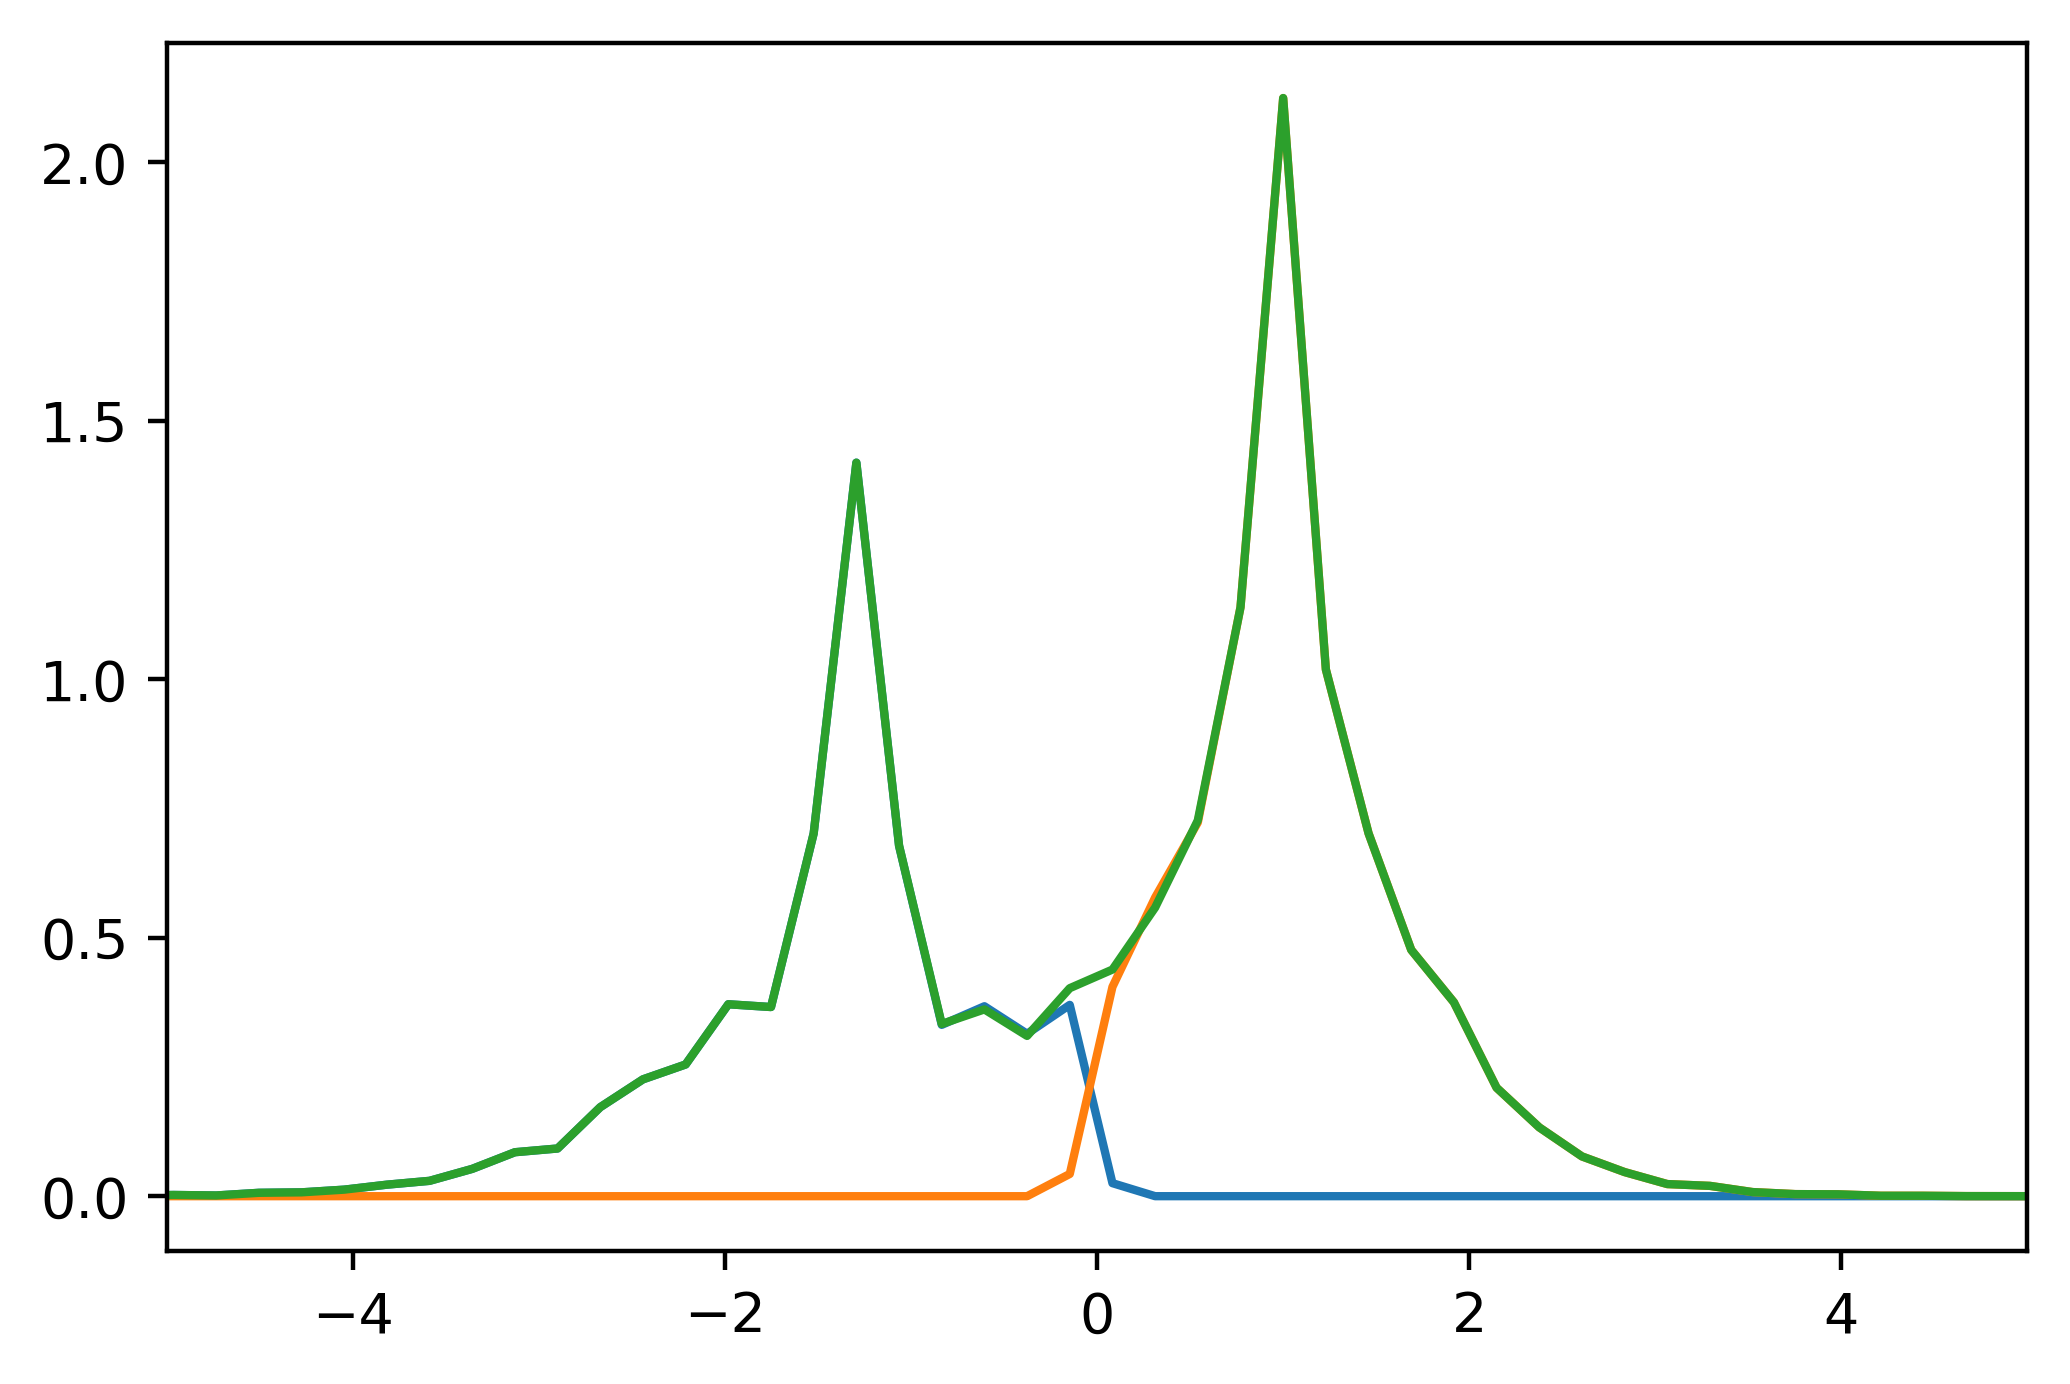

In [324]:
p = horton.ProAtomDB.from_file('density-comparison/CO/atoms.h5')
#mol = horton.IOData.from_file('CO.molden')
mol = horton.IOData.from_file('codebug/run.fchk')
grid = horton.BeckeMolGrid(mol.coordinates, mol.numbers, mol.pseudo_numbers, mode='keep')
moldens = mol.obasis.compute_grid_density_dm(mol.get_dm_full(), grid.points)
#wpart = horton.HirshfeldWPart(mol.coordinates, mol.numbers, mol.pseudo_numbers, grid, moldens, p, local=True)
wpart = horton.BeckeWPart(mol.coordinates, mol.numbers, mol.pseudo_numbers, grid, moldens, local=True, k=10)
wpart.do_charges()
wpart.do_density_decomposition()
f = plt.figure(dpi=400)
xmin = grid.points[:, 2].min()
xmax = grid.points[:, 2].max()
plt.axvline(9.448631, color='lightgrey')
plt.axvline(5.669178, color='lightgrey')
#xmin, xmax = 4, 12
nhistpoints = 200
atdens = [moldens[:len(grid.subgrids[0].weights)], moldens[len(grid.subgrids[0].weights):]]
atweights = [grid.weights[:len(grid.subgrids[0].weights)], grid.weights[len(grid.subgrids[0].weights):]]
for aidx in (0, 1):
    g1 = wpart.get_grid(aidx)
    xs = g1.points[:, 2]
    ys = wpart.cache.load('at_weights', aidx)*wpart.get_moldens(aidx)*g1.weights
    print (ys.sum())
    bins = np.linspace(xmin, xmax, nhistpoints)
    hist, bin_e = np.histogram(xs, bins, weights=ys, density=False)
    print (hist.sum())
    bins = (bin_e[1:] + bin_e[:-1])/2
    #plt.plot(bins, hist)
    spl = CubicSpline(bins, hist)
    xss = np.linspace(-5, 5, 50)
    yss = spl(xss)
    plt.plot(bins, hist)

xs = grid.points[:, 2]
ys = moldens*grid.weights
bins = np.linspace(xmin, xmax, nhistpoints)
hist, bin_e = np.histogram(xs, bins, weights=ys, density=False)
bins = (bin_e[1:] + bin_e[:-1])/2

spl = CubicSpline(bins, hist)
xss = np.linspace(4, 12, 100)
yss = spl(xss)
plt.plot(bins, hist)
print (hist.sum())
plt.xlim(-5, 5)

Initialized: <horton.part.proatomdb.ProAtomDB object at 0x7f452f415790>
  Numbers : [8, 6]
  Records : [(8, 3.0), (8, 2.0), (8, -1.0), (8, 1.0), (6, 1.0), (8, 0.0), (6, 0.0), (6, -2.0), (6,
            3.0), (8, -2.0), (6, 2.0), (6, -1.0)]

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f452f61f8d8>
  Number of basis functions         : 18
  Number of normalization constants : 44
  Maximum shell type                : 1
  Center     0 :  S6 S3 P3 S1 P1
  Center     1 :  S6 S3 P3 S1 P1

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f452f4a9f50>
  Size               : 6244
  Switching function : k=3

Performing a density-based AIM analysis with a wavefunction as input.
  Molecular grid    : <horton.grid.molgrid.BeckeMolGrid object at 0x7f452f4a9f50>
  Using local grids : True
  Scheme       : Hirshfeld
  Proatomic DB 

(-5, 5)

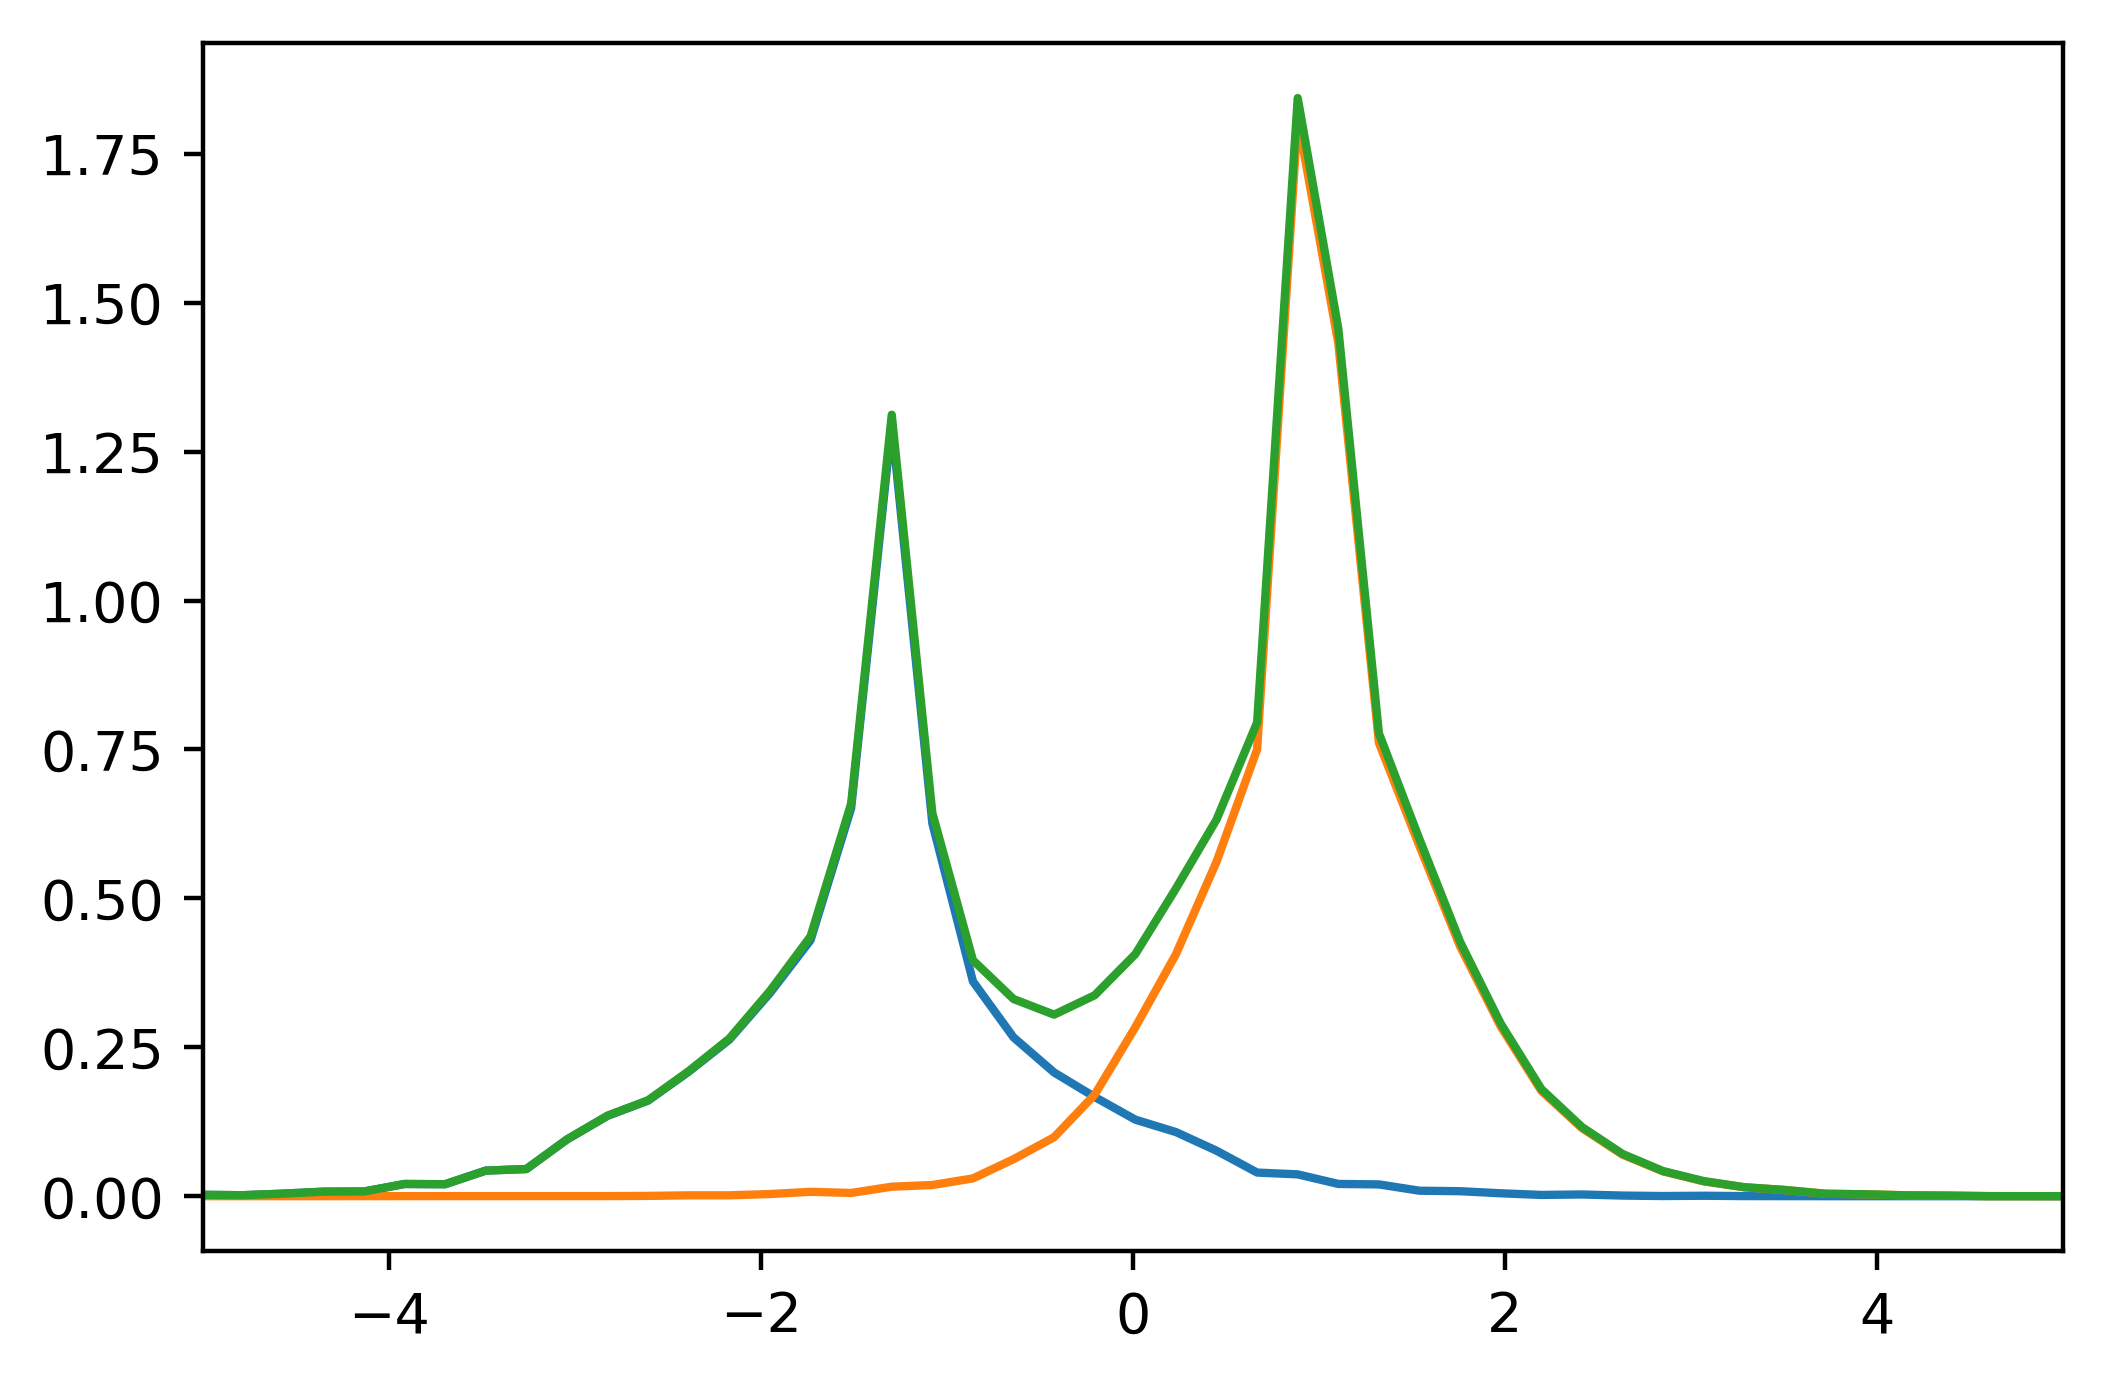

In [325]:
p = horton.ProAtomDB.from_file('density-comparison/CO/atoms.h5')
#mol = horton.IOData.from_file('CO.molden')
mol = horton.IOData.from_file('codebug/run.fchk')
grid = horton.BeckeMolGrid(mol.coordinates, mol.numbers, mol.pseudo_numbers, mode='keep')
moldens = mol.obasis.compute_grid_density_dm(mol.get_dm_full(), grid.points)
wpart = horton.HirshfeldWPart(mol.coordinates, mol.numbers, mol.pseudo_numbers, grid, moldens, p, local=True)
#wpart = horton.BeckeWPart(mol.coordinates, mol.numbers, mol.pseudo_numbers, grid, moldens, local=True)
wpart.do_charges()
wpart.do_density_decomposition()
f = plt.figure(dpi=400)
xmin = grid.points[:, 2].min()
xmax = grid.points[:, 2].max()
plt.axvline(9.448631, color='lightgrey')
plt.axvline(5.669178, color='lightgrey')
#xmin, xmax = 4, 12
nhistpoints = 200
atdens = [moldens[:len(grid.subgrids[0].weights)], moldens[len(grid.subgrids[0].weights):]]
atweights = [grid.weights[:len(grid.subgrids[0].weights)], grid.weights[len(grid.subgrids[0].weights):]]
for aidx in (0, 1):
    g1 = wpart.get_grid(aidx)
    xs = g1.points[:, 2]
    ys = wpart.cache.load('at_weights', aidx)*wpart.get_moldens(aidx)*g1.weights
    print (ys.sum())
    bins = np.linspace(xmin, xmax, nhistpoints)
    hist, bin_e = np.histogram(xs, bins, weights=ys, density=False)
    print (hist.sum())
    bins = (bin_e[1:] + bin_e[:-1])/2
    #plt.plot(bins, hist)
    spl = CubicSpline(bins, hist)
    xss = np.linspace(-5, 5, 50)
    yss = spl(xss)
    plt.plot(bins, hist)

xs = grid.points[:, 2]
ys = moldens*grid.weights
bins = np.linspace(xmin, xmax, nhistpoints)
hist, bin_e = np.histogram(xs, bins, weights=ys, density=False)
bins = (bin_e[1:] + bin_e[:-1])/2

spl = CubicSpline(bins, hist)
xss = np.linspace(4, 12, 100)
yss = spl(xss)
plt.plot(bins, hist)
print (hist.sum())
plt.xlim(-5, 5)

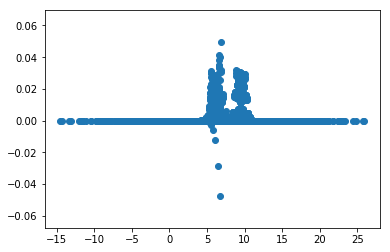

In [229]:
plt.scatter(grid.points[:, 0], moldens*grid.weights)

In [310]:
xs = np.linspace(-5, 5, 100)
xyz = np.column_stack(map(np.ndarray.ravel, np.meshgrid(xs, xs, xs)))
rho_grid = mol.obasis.compute_grid_density_dm(mol.get_dm_full(), xyz)

In [311]:
hist, bins = np.histogram(xyz[:, 2], weights=rho_grid, bins=100, range=(-5, 5))
bins = (bins[:-1] + bins[1:])/2

14.000000000000002
10.0


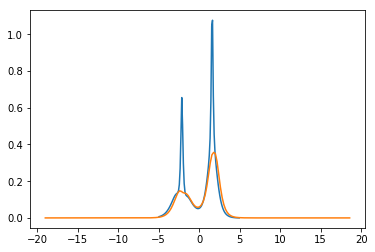

In [322]:
plt.plot(bins, hist/965.8675635756102)
print ((hist/965.8675635756102).sum())
plt.plot(xscube-19, 0.5*yscube/108.0266788259585)
print ((yscube/108.0266788259585).sum())
#plt.xlim(-5, 5)

In [288]:
yscube = np.array([4.52563891e-07, 3.79790138e-07, 3.75747403e-07, 4.07410910e-07,
       4.79099399e-07, 5.77224478e-07, 6.81689562e-07, 7.67959687e-07,
       7.68811307e-07, 1.03633839e-06, 8.90547327e-07, 9.72494593e-07,
       9.46861900e-07, 8.73672067e-07, 7.63863251e-07, 6.51736045e-07,
       5.50683047e-07, 4.82041382e-07, 4.24202298e-07, 4.15820936e-07,
       4.08144977e-07, 4.25259879e-07, 4.06136318e-07, 4.18865545e-07,
       4.10240433e-07, 4.69676668e-07, 5.21354106e-07, 6.71108979e-07,
       8.54219662e-07, 1.14110038e-06, 1.48205987e-06, 1.91722094e-06,
       2.52062507e-06, 3.31485732e-06, 4.54832657e-06, 6.11321426e-06,
       8.68249495e-06, 1.20203884e-05, 1.74744777e-05, 2.45766474e-05,
       3.58401941e-05, 5.07716590e-05, 7.39309313e-05, 1.05313410e-04,
       1.53136215e-04, 2.19381696e-04, 3.18775757e-04, 4.58883951e-04,
       6.66705671e-04, 9.63663583e-04, 1.40070487e-03, 2.03148954e-03,
       2.95521503e-03, 4.29801983e-03, 6.25952942e-03, 9.12568760e-03,
       1.33094265e-02, 1.94444157e-02, 2.84034505e-02, 4.15700712e-02,
       6.08145226e-02, 8.91276194e-02, 1.30543222e-01, 1.91468043e-01,
       2.80589198e-01, 4.11483096e-01, 6.02655421e-01, 8.82349483e-01,
       1.28903476e+00, 1.87948901e+00, 2.72962352e+00, 3.94537029e+00,
       5.65963712e+00, 8.03520797e+00, 1.12320421e+01, 1.53491296e+01,
       2.02752603e+01, 2.54801485e+01, 2.98340618e+01, 3.18856054e+01,
       3.12093748e+01, 2.97310582e+01, 2.91805429e+01, 2.84651863e+01,
       2.62764511e+01, 2.29075038e+01, 1.92889439e+01, 1.61880549e+01,
       1.39534521e+01, 1.27170636e+01, 1.25138940e+01, 1.34686537e+01,
       1.58366723e+01, 2.01155852e+01, 2.69868474e+01, 3.71420008e+01,
       5.04320000e+01, 6.45209520e+01, 7.42604395e+01, 7.70477887e+01,
       7.58018287e+01, 6.64099915e+01, 5.11044800e+01, 3.59935236e+01,
       2.40784160e+01, 1.57027643e+01, 1.01193785e+01, 6.50329626e+00,
       4.17864466e+00, 2.69567011e+00, 1.74357991e+00, 1.13451407e+00,
       7.40157728e-01, 4.86042595e-01, 3.19725293e-01, 2.11729508e-01,
       1.40296520e-01, 9.35880057e-02, 6.24037366e-02, 4.18843914e-02,
       2.80812261e-02, 1.89425475e-02, 1.27628125e-02, 8.64318845e-03,
       5.85101138e-03, 3.97353946e-03, 2.70296575e-03, 1.83867438e-03,
       1.25741060e-03, 8.55805696e-04, 5.88840075e-04, 4.00509805e-04,
       2.77579814e-04, 1.88541204e-04, 1.31804931e-04, 8.93636649e-05,
       6.30791837e-05, 4.26444093e-05, 3.03624529e-05, 2.04578958e-05,
       1.46805070e-05, 9.93634073e-06, 7.23349157e-06, 4.97841830e-06,
       3.68816811e-06, 2.65622290e-06, 2.05115168e-06, 1.63080137e-06,
       1.40409833e-06, 1.33947962e-06, 1.29616597e-06, 1.31762100e-06,
       1.24615590e-06, 1.18334834e-06, 1.01604680e-06, 8.65978299e-07,
       6.78416124e-07, 5.41630156e-07, 4.45189069e-07, 4.64033451e-07,
       5.32803299e-07, 6.70958360e-07, 8.24303223e-07, 9.95347453e-07,
       1.12109501e-06, 1.20856285e-06, 1.27129645e-06, 1.34306193e-06,
       1.37845222e-06, 1.37844361e-06, 1.34983829e-06, 1.28559797e-06,
       1.20509600e-06, 1.09777145e-06, 9.81611785e-07, 8.64250829e-07,
       7.55856977e-07, 6.57836494e-07, 5.70616436e-07, 4.97333214e-07])
xscube = np.array([ 0.     ,  0.20997,  0.41994,  0.62991,  0.83988,  1.04985,
        1.25982,  1.46979,  1.67976,  1.88973,  2.0997 ,  2.30967,
        2.51964,  2.72961,  2.93958,  3.14955,  3.35952,  3.56949,
        3.77946,  3.98943,  4.1994 ,  4.40937,  4.61934,  4.82931,
        5.03928,  5.24925,  5.45922,  5.66919,  5.87916,  6.08913,
        6.2991 ,  6.50907,  6.71904,  6.92901,  7.13898,  7.34895,
        7.55892,  7.76889,  7.97886,  8.18883,  8.3988 ,  8.60877,
        8.81874,  9.02871,  9.23868,  9.44865,  9.65862,  9.86859,
       10.07856, 10.28853, 10.4985 , 10.70847, 10.91844, 11.12841,
       11.33838, 11.54835, 11.75832, 11.96829, 12.17826, 12.38823,
       12.5982 , 12.80817, 13.01814, 13.22811, 13.43808, 13.64805,
       13.85802, 14.06799, 14.27796, 14.48793, 14.6979 , 14.90787,
       15.11784, 15.32781, 15.53778, 15.74775, 15.95772, 16.16769,
       16.37766, 16.58763, 16.7976 , 17.00757, 17.21754, 17.42751,
       17.63748, 17.84745, 18.05742, 18.26739, 18.47736, 18.68733,
       18.8973 , 19.10727, 19.31724, 19.52721, 19.73718, 19.94715,
       20.15712, 20.36709, 20.57706, 20.78703, 20.997  , 21.20697,
       21.41694, 21.62691, 21.83688, 22.04685, 22.25682, 22.46679,
       22.67676, 22.88673, 23.0967 , 23.30667, 23.51664, 23.72661,
       23.93658, 24.14655, 24.35652, 24.56649, 24.77646, 24.98643,
       25.1964 , 25.40637, 25.61634, 25.82631, 26.03628, 26.24625,
       26.45622, 26.66619, 26.87616, 27.08613, 27.2961 , 27.50607,
       27.71604, 27.92601, 28.13598, 28.34595, 28.55592, 28.76589,
       28.97586, 29.18583, 29.3958 , 29.60577, 29.81574, 30.02571,
       30.23568, 30.44565, 30.65562, 30.86559, 31.07556, 31.28553,
       31.4955 , 31.70547, 31.91544, 32.12541, 32.33538, 32.54535,
       32.75532, 32.96529, 33.17526, 33.38523, 33.5952 , 33.80517,
       34.01514, 34.22511, 34.43508, 34.64505, 34.85502, 35.06499,
       35.27496, 35.48493, 35.6949 , 35.90487, 36.11484, 36.32481,
       36.53478, 36.74475, 36.95472, 37.16469, 37.37466, 37.58463])

In [314]:
hist.sum()/14

965.8675635756102